# Class 24: Unsupervised learning

Plan for today:
- Clustering
- Object-oriented programming


In [1]:
import YData

# YData.download.download_class_code(24)   # get class code    
# YData.download.download_class_code(24, TRUE) # get the code with the answers 

# YData.download.download_homework(9)  # downloads the homework 

# project review template
# YData.download.download_class_file('reviewer_template.ipynb', 'homework')


If you are using colabs, you should run the code below.

In [2]:
# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import statistics
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from urllib.request import urlopen

import matplotlib.pyplot as plt
%matplotlib inline

# Suppress ConvergenceWarning - please ignore this code 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [4]:
# Get our penguin data that we can use to test that our code is working properly

from sklearn.model_selection import train_test_split

penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins = penguins.sample(frac = 1)

X_penguin_features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y_penguin_labels = penguins['species']


## 1. Unsupervised learning: clustering

We can do k-means clustering in scikit-learn using the `KMeans()` object.


In [5]:
from sklearn.cluster import KMeans

# fit k-means with 3 clusters 

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_penguin_features)

KMeans(n_clusters=3)

In [6]:
# see which cluster each point belongs to 

predicted_labels = kmeans.predict(X_penguin_features)
predicted_labels

array([0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 2, 1,
       2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1,
       2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0,
       0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2,
       0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2,
       2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2,
       0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2,
       0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1,

In [7]:
# look at a matrix of which penguin types end up in which cluster 

matrix = pd.DataFrame({'labels': predicted_labels, 
                       'species': y_penguin_labels})

ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0           108         52       1
1             0          0      70
2            38         16      48


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# do clustering with feature normalization 
scaler = StandardScaler()
pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(X_penguin_features)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [9]:
# see which cluster each (normalized) point belongs to

predicted_labels2 = pipeline.predict(X_penguin_features)

predicted_labels2


array([0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1,
       2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2,
       2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1,
       0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0,
       1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 2,
       1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0,
       2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1,
       1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0,
       2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1,

In [10]:
# look at a matrix of which penguin types end up in which cluster 

matrix_new = pd.DataFrame({'labels': predicted_labels2, 
                           'species': y_penguin_labels})

ct_new = pd.crosstab(matrix_new['labels'], 
                     matrix_new['species'])
print(ct_new)

species  Adelie  Chinstrap  Gentoo
labels                            
0           124          5       0
1             0          0     119
2            22         63       0


### 1b. Unsupervised learning: Hierarchical clustering


In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

#  Ward's method adds points to a cluster that minimizes the sum of squared differences within all clusters
clusters = hierarchy.linkage(X_penguin_features, method="ward")   


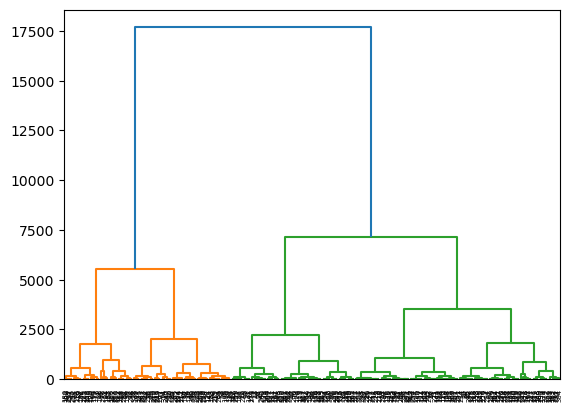

In [12]:
# display a dendrogram
dendrogram = hierarchy.dendrogram(clusters)

In [13]:
# cluster points into 3 clusters 
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(X_penguin_features)

# get the predicted cluster for each point
labels = clustering_model.labels_

labels

array([2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2,
       0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       1, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       2, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2,
       2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2,
       1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0,

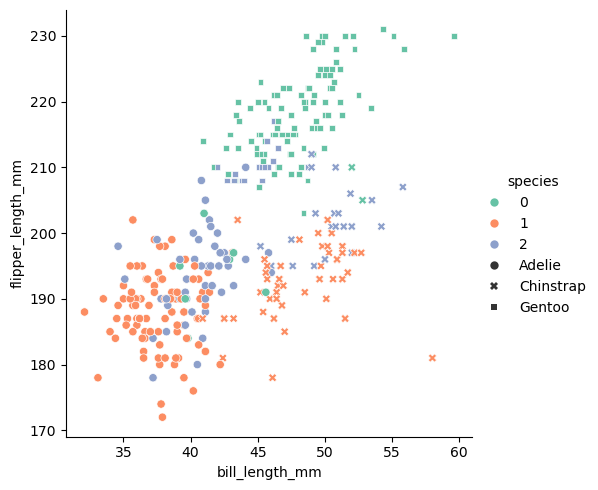

In [14]:
# visualize how well the clustering matches the penguin species

sns.relplot(X_penguin_features, 
            x='bill_length_mm', 
            y='flipper_length_mm', 
            hue=labels, 
            style = y_penguin_labels,
            palette="Set2");


## 2. Object-oriented programming

[Object-oriented programming (OOP)](https://en.wikipedia.org/wiki/Object-oriented_programming) is a programming paradigm based on the concept of objects, which can contain data and code: data in the form of fields (often known as attributes or properties), and code in the form of procedures (often known as methods). In OOP, computer programs are designed by making them out of objects that interact with one another.

Let's write our own K-Nearest Neighbor class that can create K-Nearest Neighbor classifiers!


### KNN functions

Below are the functions we previously wrote in class 22 to do K-Nearest Neighbor classification. 

We will now turn this code into a KNN object.


In [15]:

# split data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X_penguin_features,  
                                                    y_penguin_labels, 
                                                    random_state = 0)

print(X_train.shape)


(249, 4)


In [16]:
# From class 22

# Calculate the Euclidean distance
def euclid_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


# Get the labels and distances between a test point and all the training data
def get_labels_and_distances(test_point, X_train_features, y_train_labels):
    
    the_distances = []
    
    # get the distance between the test point and all training points
    for i in range(X_train_features.shape[0]):
        the_distances.append(euclid_dist(test_point, X_train_features.iloc[i]))

    
    # Create a DataFrame with the training labels and distances 
    labels_and_distances = pd.DataFrame({'label': y_train_labels, 'distance':the_distances})
    return labels_and_distances



# Classify a single test point
def classify_point(test_point, k, X_train_features, y_train_labels):
    
    labels_and_distances =  get_labels_and_distances(test_point, 
                                                     X_train_features, 
                                                     y_train_labels)

    sorted_labels_dist = labels_and_distances.sort_values("distance")
    sorted_labels_dist = sorted_labels_dist.iloc[0:k]
    
    
    count_table = sorted_labels_dist.groupby("label").count().reset_index()
    sorted_count_table = count_table.sort_values("distance", ascending = False)
    majority_class = sorted_count_table.iloc[0]["label"]
    
    return majority_class



# Classify a whole test set
def classify_all_test_data(X_test_data, k, X_train_features, y_train_labels):
    
    predictions = []
    
    for i in range(X_test_data.shape[0]):
        
        curr_test_point = X_test_data.iloc[i]
        
        curr_prediction = classify_point(curr_test_point, 
                                         k, 
                                         X_train_features, 
                                         y_train_labels)
        
        predictions.append(curr_prediction)

    return np.array(predictions)



all_predictions = classify_all_test_data(X_test, 5, X_train, y_train)

all_predictions

array(['Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap'],
      dtype='<U9')

### Object constructor

To start, let's write the "constructor" code that can be used to create a new KNN object. This code will simply store the number of neighbors used in a field called `k`. 


In [17]:
class KNN:
    
    # Constructor
    def __init__(self, n_neighbors): 

        self.k = n_neighbors  


In [18]:
# create an instance
my_KNN = KNN(n_neighbors = 5)

my_KNN

In [19]:
# get the value stored property k
my_KNN.k

5

### The .fit() method

Let's now write the `.fit()` method. This method will merely store the training and test data into fields called `X_train` and `y_train`. 


In [20]:
class KNN:
    
    # Constructor
    def __init__(self, n_neighbors): 
        self.k = n_neighbors 

    # The fit method
    def fit(self, X_features_train, y_labels_train):
        self.X_train = X_features_train
        self.y_train = y_labels_train


In [21]:
# Create an KNN object and try the .fit() method 
my_KNN = KNN(n_neighbors = 5)

my_KNN.fit(X_train, y_train)

my_KNN.y_train


240       Gentoo
143       Adelie
181    Chinstrap
103       Adelie
110       Adelie
         ...    
104       Adelie
128       Adelie
54        Adelie
342       Gentoo
204    Chinstrap
Name: species, Length: 249, dtype: object

### The .predict() method

Now let's write the `.predict()` method which will take a test data set `X_test` and will make predictions for which class each test point belongs to. 

To do this we will cheat a little and use the classification functions we wrote previous (i.e., the functions above). We could also just include these functions into our object (i.e., cut and paste them into our object). 


In [22]:
class KNN:
    
    # Constructor
    def __init__(self, n_neighbors): 
        self.k = n_neighbors 

    # The fit method
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # The predict method
    def predict(self, X_test_data):
        return classify_all_test_data(X_test_data, self.k, self.X_train, self.y_train)


In [23]:
# Create an KNN object and try the .predict() method 

my_KNN = KNN(n_neighbors = 5)

my_KNN.fit(X_train, y_train)

my_KNN.predict(X_test)


array(['Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap'],
      dtype='<U9')

### Special methods

"Special methods" (also known as "dunder methods") allow objects to work in consistent/predictable ways. 

Let's add a method that makes it so our KNN object displays more useful information when we call the `print()` function on it. 


In [24]:
# What is printed when we call the print() function on our current KNN object

print(KNN)

<class '__main__.KNN'>


In [25]:
class KNN:
    
    # Constructor
    def __init__(self, n_neighbors): 
        self.k = n_neighbors 

    # The fit method
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # The predict method
    def predict(self, X_test_data):
        return classify_all_test_data(X_test_data, self.k, self.X_train, self.y_train)

    # The print "special" method
    def __str__(self):
        return f"KKN(n_neighbors = {self.k})"


In [26]:
# Test the print() method
my_KNN = KNN(n_neighbors = 5)

print(my_KNN)

KKN(n_neighbors = 5)


<br>
<br>
<br>
<br>
<br>
<br>

![](https://theenglishtree.it/wp-content/uploads/2016/10/Untitled.png)